## **Prediksi Time Series Oleh Nurul Tazkiyah Adam**

In [40]:
# memastikan tensorflow yang digunakan versi 2 atau lebih
import tensorflow as tf
print(tf.__version__)

2.9.2


In [41]:
# download dataset dari google drive https://drive.google.com/file/d/1ShO035_gg0piR9xrWq8utZh1lei4tBsA/view?usp=sharing
!gdown 1ShO035_gg0piR9xrWq8utZh1lei4tBsA

Downloading...
From: https://drive.google.com/uc?id=1ShO035_gg0piR9xrWq8utZh1lei4tBsA
To: /content/london_weather.csv
100% 814k/814k [00:00<00:00, 158MB/s]


In [42]:
import pandas as pd

df = pd.read_csv('london_weather.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [44]:
df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [45]:
df = df.drop(columns=['cloud_cover', 'sunshine', 'global_radiation','max_temp','min_temp', 'precipitation', 'pressure', 'snow_depth'])
df.shape

(15341, 2)

In [46]:
df.head()

,date,mean_temp
0,19790101,-4.1
1,19790102,-2.6
2,19790103,-2.8
3,19790104,-2.6
4,19790105,-0.8


Text(0.5, 1.0, 'temperature')

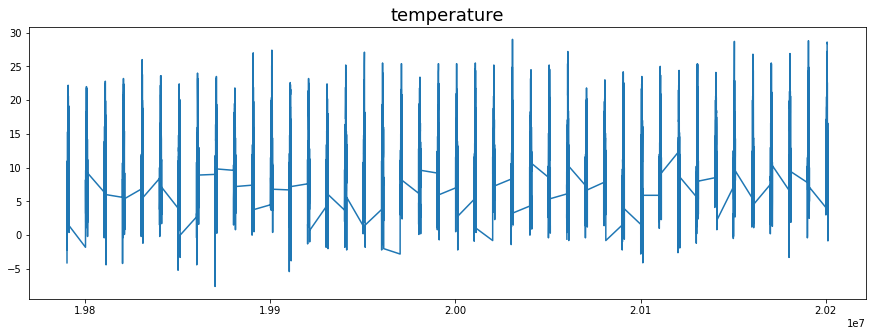

In [47]:
import matplotlib.pyplot as plt

dates = df['date'].values
temp  = df['mean_temp'].values
 
plt.figure(figsize=(15,5))
plt.plot(df['date'].values, df['mean_temp'].values)
plt.title('temperature', fontsize=18)

# Impute Missing Value

In [48]:
import datetime
from datetime import date

df.columns=['date','mean_temp']

#  fromat date dalam bentuk Year, month dan day
df['date']=pd.to_datetime(df['date'], format='%Y-%m-%d')

# set date menjadi index
dataset= df.set_index('date')

# cek data shape
dataset.shape

(15341, 1)

In [49]:
dataset.head() # cek isi data setelah implementasi perubahan index dan format date

,mean_temp
date,
1970-01-01 00:00:00.019790101,-4.1
1970-01-01 00:00:00.019790102,-2.6
1970-01-01 00:00:00.019790103,-2.8
1970-01-01 00:00:00.019790104,-2.6
1970-01-01 00:00:00.019790105,-0.8


In [50]:
# membuat series True or False untuk data NaN (missing) and present data respectively. 
nul_data = pd.isnull(dataset['mean_temp']) 
    
# print only the data, mean_temp = NaN 
dataset[nul_data].head()

,mean_temp
date,
1970-01-01 00:00:00.020050912,NaN
1970-01-01 00:00:00.020051015,NaN
1970-01-01 00:00:00.020051230,NaN
1970-01-01 00:00:00.020060109,NaN
1970-01-01 00:00:00.020060203,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Plotting microsecond time intervals is not well supported; please see the MicrosecondLocator documentation for details.
  for label in axis.get_ticklabels()])
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Plotting microsecond time intervals is not well supported; please see the MicrosecondLocator documentation for details.
  fig.canvas.print_figure(bytes_io, **kw)


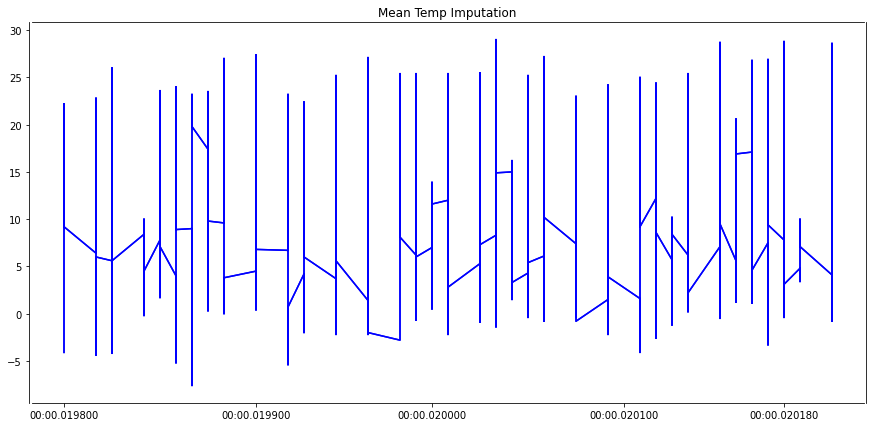

In [51]:
plt.rcParams['figure.figsize']=(15,7)

# untuk mengisi data yang hilang menggunakan mean dari data
dataset = dataset.assign(FillMeanTemp=dataset.mean_temp.fillna(dataset.mean_temp.mean()))

plt.plot(dataset, color='blue')

plt.title('Mean Temp Imputation')

plt.show()

In [52]:
dataset.head() #mengecek data setelah memperbaiki missing value

,mean_temp,FillMeanTemp
date,,
1970-01-01 00:00:00.019790101,-4.1,-4.1
1970-01-01 00:00:00.019790102,-2.6,-2.6
1970-01-01 00:00:00.019790103,-2.8,-2.8
1970-01-01 00:00:00.019790104,-2.6,-2.6
1970-01-01 00:00:00.019790105,-0.8,-0.8


In [53]:
dataset.shape

(15341, 2)

In [57]:
dataset.reset_index(drop=False, inplace=True) #mengembalikan index date ke data semula

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         15341 non-null  int64         
 1   date          15341 non-null  datetime64[ns]
 2   mean_temp     15305 non-null  float64       
 3   FillMeanTemp  15341 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 479.5 KB


In [59]:
dataset.isnull().sum()

index            0
date             0
mean_temp       36
FillMeanTemp     0
dtype: int64

# Normalisasi

In [60]:
from sklearn import preprocessing
import numpy as np


scaler = preprocessing.MinMaxScaler()
tmp_scaler = scaler.fit_transform(dataset['FillMeanTemp'].values.reshape(-1,1))
tmp_scaler

array([[0.09562842],
       [0.13661202],
       [0.13114754],
       ...,
       [0.27868852],
       [0.28142077],
       [0.18579235]])

In [61]:
tmp_fix = tmp_scaler.reshape(-1)

# Split Data

In [62]:
from sklearn.model_selection import train_test_split

#melatih data latih dan data uji 
dt_train, dt_test, tmp_train, tmp_test = train_test_split(dataset['date'].values, tmp_fix, test_size=0.2, shuffle=False)
print(dt_train.shape, tmp_train.shape)
print(dt_test.shape, tmp_test.shape)


(12272,) (12272,)
(3069,) (3069,)


In [63]:
#mengubah data kita menjadi format yang dapat diterima oleh model. 
#series/atribut dikonversi menjadi tipe numpy, lalu mengembalikan label dan atribut dari dataset dalam bentuk batch.

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [64]:
train_set = windowed_dataset(tmp_train, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(tmp_test, window_size=60, batch_size=100, shuffle_buffer=1000)

# Model 

In [67]:
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, LSTM, Dropout

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60)),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [68]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [69]:
max_mae = (tmp_fix.max() - tmp_fix.min()) * 10/100
print(f'Batas nilai mae: harus dibawah {max_mae}')

Batas nilai mae: harus dibawah 0.1


In [70]:
class berhenti(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('mae') < 0.1):
      self.model.stop_training = True
      print('\nalhamdulillah MAE pada model telah < 10% skala data')
iniCallback = berhenti()

In [71]:
tf.keras.backend.set_floatx('float64')

In [72]:
history = model.fit(train_set,
                    validation_data = val_set, # menampilkan akurasi pengujian data validasi
                    epochs=500, batch_size=60, 
                    callbacks = [iniCallback])

Epoch 1/500
      6/Unknown - 6s 94ms/step - loss: 0.1294 - mae: 0.4845

123/123 [==============================] - 17s 100ms/step - loss: 0.1003 - mae: 0.4206 - val_loss: 0.0760 - val_mae: 0.3633
Epoch 2/500
123/123 [==============================] - 11s 84ms/step - loss: 0.0569 - mae: 0.3046 - val_loss: 0.0460 - val_mae: 0.2701
Epoch 3/500
123/123 [==============================] - 11s 86ms/step - loss: 0.0352 - mae: 0.2279 - val_loss: 0.0289 - val_mae: 0.2037
Epoch 4/500
123/123 [==============================] - 11s 85ms/step - loss: 0.0234 - mae: 0.1787 - val_loss: 0.0196 - val_mae: 0.1613
Epoch 5/500
123/123 [==============================] - 11s 86ms/step - loss: 0.0173 - mae: 0.1503 - val_loss: 0.0146 - val_mae: 0.1375
Epoch 6/500
123/123 [==============================] - 11s 86ms/step - loss: 0.0142 - mae: 0.1360 - val_loss: 0.0120 - val_mae: 0.1246
Epoch 7/500
123/123 [==============================] - 11s 85ms/step - loss: 0.0124 - mae: 0.1273 - val_loss: 0.0107 - val_mae: 0.1182
Epoch 8/500
123/123 [==============================] - 11s 86ms/st

Text(0.5, 1.0, 'Training and Validation Loss')

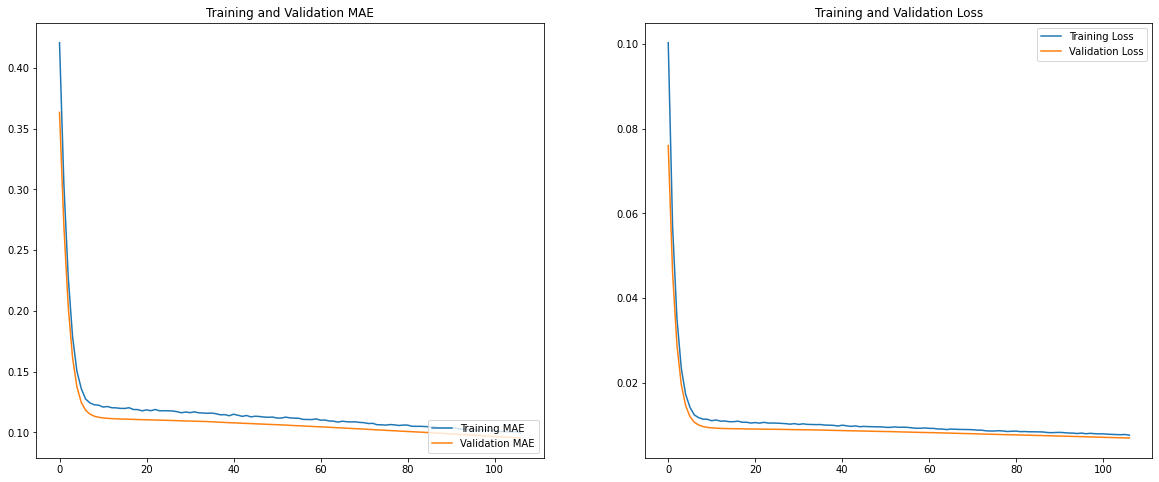

In [73]:
import numpy as np

maee = history.history['mae']
val_mae = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(maee))

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, maee, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.legend(loc='lower right')
plt.title('Training and Validation MAE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Prediksi

In [74]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

478/478 [==============================] - 12s 22ms/step


Text(0.5, 1.0, 'Temperature Predictions')

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Plotting microsecond time intervals is not well supported; please see the MicrosecondLocator documentation for details.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Plotting microsecond time intervals is not well supported; please see the MicrosecondLocator documentation for details.
  for label in axis.get_ticklabels()])
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Plotting microsecond time intervals is not well supported; please see the MicrosecondLocator documentation for details.
  fig.canvas.print_figure(bytes_io, **kw)


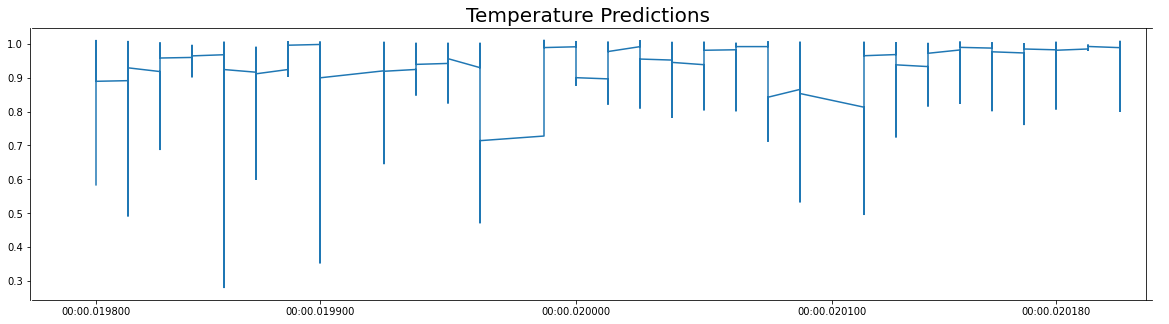

In [75]:
# test prediksi 

test_dt = dataset['date'].values
test_tmp  = dataset['FillMeanTemp'].values

predictions = model_forecast(model, test_tmp, 60)
predictions = np.array([prediction[0] for prediction in predictions])
range = test_dt[:len(predictions)]

plt.figure(figsize=(20,5))
plt.plot(range, predictions)
plt.title('Temperature Predictions', fontsize=20)

## **Referensi**

1.   [Sukma Ramadhan, Time Series Prediksi Energy Usage](https://github.com/onedayxzn/Time-Series-Prediksi-Energy-Usage/blob/master/TimeSeriesPrediksiEnergyUsage.ipynb )
2.   [ Farhan, Membuat Model Machine Learning dengan Data Time Series](https://)
3.   [A Complete Guide on How to Impute Missing Values in Time Series in Python](hhttps://www.section.io/engineering-education/missing-values-in-time-series/)
4.  [ Time-Series Traffic Forecasting in Colab](https://youtu.be/xt8G0ltVl4Q)
5.  [Memprediksi Harga Emas dengan Backpropagation di Python (Dataset Kaggle)](https://youtu.be/Chg_Vtm-r88)
